In [3]:
# imports
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from networkx import Graph
from sklearn.cluster import KMeans

## Loading data:

In [4]:

def load_example1():
    return nx.read_edgelist("example1.dat", delimiter=",", nodetype=int, create_using=Graph)


def load_example2():
    return nx.read_weighted_edgelist("example2.dat", delimiter=",", nodetype=int, create_using=Graph)


## Algorithm:

In [5]:
def step1(graph):
    """
    Creates adjacency matrix
    :param graph: NetworkX graph
    :return: Adjacency matrix as 2d numpy array
    """
    A = np.array(nx.adjacency_matrix(graph).todense())
    return A


def step2(A):
    """
    Constructs matrix L
    :param A: Adjacency matrix from previous step
    :return: Matrix L
    """
    D = np.diag(np.sum(A, axis=1) ** (-1 / 2))
    L = D @ A @ D
    return L


def step3(L, k):
    """
    :param L: Matrix to take eigen vectors from
    :param k: amount of eigen vectors
    :return: k largest eigen vectors
    """
    _, eigh = np.linalg.eigh(L)
    return eigh[:, -k:]


def step4(X):
    """
    :param X: Renormalizes X
    :return: Renormilized X
    """
    X_pow = np.sum(X ** 2, axis=0) ** (1 / 2)
    Y = (X / X_pow)
    return Y


def step5(Y, k):
    """
    Runs k means on Y
    :param Y: Input matrix
    :param k: number of clusters
    :return: categories for every row of Y matrix
    """
    kmeans = KMeans(n_clusters=k).fit(Y)
    return kmeans.labels_


In [6]:
def main(k, graph):
    A = step1(graph)
    L = step2(A)
    X = step3(L, k)
    Y = step4(X)
    labels = step5(Y, k)
    plt.figure()
    nx.draw(graph, node_size=2, node_color=labels, width=0.1)
    plt.show()

## Example 1

C:\Users\matfr\AppData\Local\Temp\ipykernel_23676\1219967918.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(graph).todense())
C:\Users\matfr\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


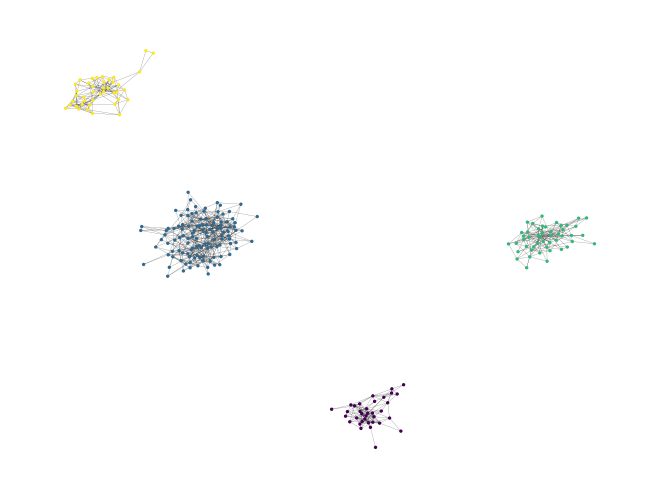

In [7]:
main(4, load_example1())

### Example 2

C:\Users\matfr\AppData\Local\Temp\ipykernel_23676\1219967918.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(graph).todense())
C:\Users\matfr\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


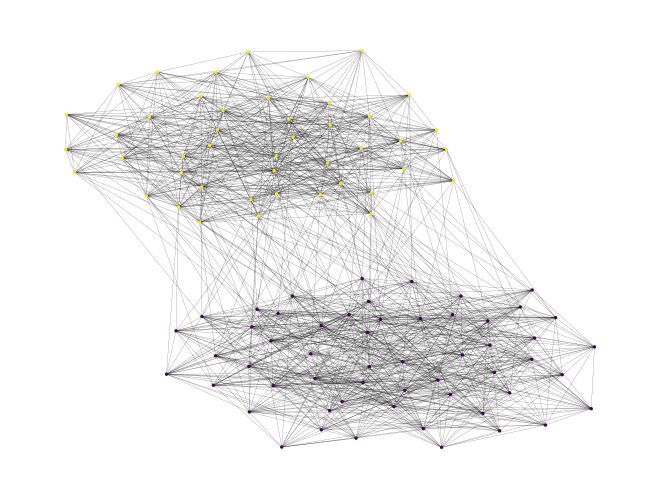

In [8]:
main(2, load_example2())